In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
import healpy as hp
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats

In [64]:
# Define all relevant physical variables needed throughout the program, including:
# - number of LRG sources
# - number of survey (non-LRG) sources
# - coordinates for LRGs
# - coordinates for survey sources
# - projected radius from LRGs
# - LRG redshift
# - gmag and rmag for survey sources
# - gmag and rmag for LRGs
# - (g-r) color survey sources
# - (g-r) color for LRGs

# Number of LRG sources
lrg = 25

# Number of survey (non-LRG) sources
survey = 500

# Fake coordinates for LRG sources
random.seed(1)
x0 = [np.random.uniform(0,5) for j in range(lrg)]

random.seed(2)
y0 = [np.random.uniform(0,5) for j in range(lrg)]

# y0 = random.sample(y0, len(y0))
# print("length of fake LRG sources (ra) = ", len(x0))
# print("length of fake LRG sources (dec) = ", len(y0))
# print("x0 = ", x0)
# print("y0 = ", y0)
# print(type(y0))

# Fake coordinates for survey sources
random.seed(3)
x1 = [np.random.uniform(0,5) for j in range(survey)]

random.seed(4)
y1 = [np.random.uniform(0,5) for j in range(survey)]
# y1 = random.sample(y1, len(y1))
    
# print("length of fake survey sources (ra) = ", len(x1))
# print("length of fake survey sources (dec) = ", len(y1))    

# In order for there to be at least one guaranteed satellite, combine the survey and lrg position arrays so that one
# survey source position is the same as an LRG position
x_plus = np.concatenate([x0, x1])
y_plus = np.concatenate([y0, y1])

# print("length of x_plus (ra) (lrgs + survey) =", len(x_plus))
# print("length of y_plus (dec) (lrg + survey) =", len(y_plus))

# Redshift for LRG 
random.seed(0.2)
z = [np.random.uniform(0.1,0.5) for j in range(lrg)]
    
# print("length of array of redshifts for fake LRGs =", len(z))
# print("max z = ", np.amax(z))
# print("min z = ", np.amin(z))

# Magnitudes for survey sources
random.seed(15)
gmag_plus = [np.random.uniform(14,29) for j in range(len(x_plus))]
random.seed(16)
rmag_plus = [np.random.uniform(13,24) for j in range(len(x_plus))]

gmag_plus = np.array(gmag_plus)
rmag_plus = np.array(rmag_plus)
color_plus = gmag_plus - rmag_plus
    
# print("length of gmag for survey soruces =", len(gmag_plus))
# print("length of rmag for survey soruces =", len(rmag_plus))
# print("max gmag_plus = ", np.amax(gmag_plus))
# print("min gmag_plus = ", np.amin(gmag_plus))
# print("max rmag_plus = ", np.amax(rmag_plus))
# print("min rmag_plus = ", np.amin(rmag_plus))
# print("length of color_plus = ", len(color_plus))
# print("max color = ", np.amax(color_plus))
# print("min color = ", np.amin(color_plus))

random.seed(15)
gmag_survey = [np.random.uniform(14,29) for j in range(len(x1))]
random.seed(16)
rmag_survey = [np.random.uniform(13,24) for j in range(len(x1))]

gmag_survey = np.array(gmag_survey)
rmag_survey = np.array(rmag_survey)
color_survey = gmag_survey - rmag_survey
    
# print("length of gmag for survey soruces =", len(gmag_survey))
# print("length of rmag for survey soruces =", len(rmag_survey))
# print("max gmag_plus = ", np.amax(gmag_survey))
# print("min gmag_plus = ", np.amin(gmag_survey))
print("max rmag_plus = ", np.amax(rmag_survey))
print("min rmag_plus = ", np.amin(rmag_survey))
# print("length of color_plus = ", len(color_survey))
print("max color = ", np.amax(color_survey))
print("min color = ", np.amin(color_survey))

# Magnitudes for LRG sources
random.seed(20)
gmag_lrg = [np.random.uniform(17,23) for j in range(lrg)]
random.seed(21)
rmag_lrg = [np.random.uniform(16,21) for j in range(lrg)]
    
# print("length of gmag for survey soruces =", len(gmag_lrg))
# print("length of rmag for survey soruces =", len(rmag_lrg))
# print("max gmag_lrg = ", np.amax(gmag_lrg))
# print("min gmag_lrg = ", np.amin(gmag_lrg))
# print("max rmag_lrg = ", np.amax(rmag_lrg))
# print("min rmag_lrg = ", np.amin(rmag_lrg))

gmag_lrg = np.array(gmag_lrg)
rmag_lrg = np.array(rmag_lrg)
color_lrg = gmag_lrg - rmag_lrg
# print("length of color_lrg = ", len(color_lrg))

# distance = 0.5 # in Mpc
# print("distance in Mpc =", distance)
# distance_kpc = distance * 10.**3. # in kpc
# print("distance in kpc = ", distance_kpc)

max rmag_plus =  23.9690260357927
min rmag_plus =  13.005290919751259
max color =  15.315220148944462
min color =  -8.990789133597554


In [5]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z)

print("end cosmoCalc")

end cosmoCalc


In [49]:
#### TESTING FOR BESTBKG

# Convert inner radius from Mpc to kpc
# radius_inner = 5.  # in Mpc
# radius_inner_kpc = radius_inner * 10. ** 3.  # in kpc

# Converts inner radius from kpc to arcsec
# radius_inner_arcsec = []
# for i in range(len(kpc_DA)):
#     radius_inner_arcsec.append(radius_inner_kpc / kpc_DA[i]) # only using for bkg array so only need dist_inner in arcsec

# Convert outer radius from Mpc to kpc
# radius_outer = 10.  # in Mpc
# radius_outer_kpc = radius_outer * 10. ** 3.  # in kpc
radius_outer_kpc = 5000.

# Converts outer radius from kpc to degree
radius_outer_deg = []
for i in range(len(kpc_DA)):
    radius_outer_deg.append((radius_outer_kpc / kpc_DA[i]) * 1. / 3600.)

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
zip_list_LRG = list(zip(x0, y0))
zip_list_BKG = list(zip(x1, y1))

# Creates a tree of EDR sources
gal_tree_outer = KDTree(zip_list_BKG)

# find indices of sources
# creates a list of arrays that include the indices of satellite galaxies per LRG. In general, some or all of these
# arrays could be empty
ind_outer = gal_tree_outer.query_radius(zip_list_LRG, r=radius_outer_deg)

# returns a list of sources and their distances from the LRG within radius dist_outer
nn_outer, dist_outer = gal_tree_outer.query_radius(zip_list_LRG, r=radius_outer_deg, return_distance=True)

# print(nn_outer[0])
# print(dist_outer[0])
# print(len(dist_outer))
print(ind_outer[2]) 
# print(type(nn_outer))

[ 37 400 120  97 249  18 338 323 492 145 444  62 164 454 231 142 246 410
 414 423 286 498]


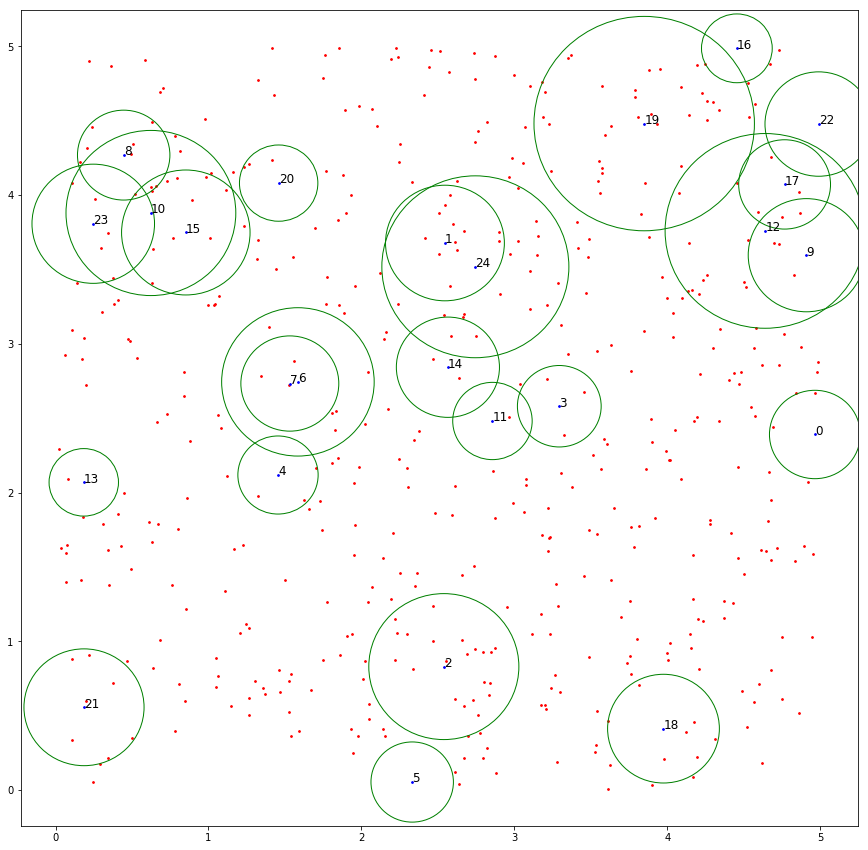

In [10]:
plt.scatter(x1, y1, s = 3, color='red')
plt.scatter(x0, y0, s = 3, color='blue')

circle1 = []
for i in range(len(x0)):
    circle1 = plt.Circle((x0[i],y0[i]), radius_outer_deg[i], color='green', fill=False)
#     circle2 = plt.Circle((x0[i],y0[i]), dist2[i], color='purple', fill=False)
    plt.gcf().gca().add_artist(circle1)
#     plt.gcf().gca().add_artist(circle2)
    
# prints ID numbers next to LRG
# This will be slightly different when using real data because those sources have real ID numbers
a = np.arange(0,lrg)
for i, txt in enumerate(a):
    text = plt.annotate(txt, (x0[i],y0[i]))
    text.set_fontsize(12)

plt.rcParams["figure.figsize"] = [15, 15]
plt.show()


In [24]:
print(ind_outer[2])
print(nn_outer[2])
print(dist_outer[2])

[ 37 400 120  97 249  18 338 323 492 145 444  62 164 454 231 142 246 410
 414 423 286 498]
[ 37 400 120  97 249  18 338 323 492 145 444  62 164 454 231 142 246 410
 414 423 286 498]
[0.38101281 0.45369151 0.32529446 0.1990144  0.3223631  0.03754699
 0.17271296 0.21310561 0.22818154 0.41258926 0.29516645 0.18474466
 0.48953023 0.39816896 0.29641212 0.23831559 0.3513477  0.28392789
 0.32295021 0.32037861 0.27441972 0.35957264]


In [63]:
dist_outer_arcsec = []
temp = []
for i in range(len(kpc_DA)):
    for j in range(len(dist_outer[i])):
        x = np.float64(dist_outer[i][j] / kpc_DA[i])
#         print(type(x))
        temp.append(x)
    dist_outer_arcsec.append(temp)
    temp = []
        
# print(len(dist_outer_arcsec))
# print(dist_outer_arcsec[49])
# print(type(dist_outer_arcsec))
# print(type(dist_outer_arcsec[0]))
# print(type(dist_outer_arcsec[0][0]))
# print(len(dist_outer_arcsec))
# print(dist_outer_arcsec.dtype)
# print(dist_outer_arcsec)
print('-------------')

# a = dist_outer[49]/kpc_DA[49]
# print(a)


dist_outer_kpc = []
temp2 = []
for i in range(len(kpc_DA)):
    for j in range(len(dist_outer[i])):
        y = np.float64(dist_outer[i][j] * 3600. * kpc_DA[i])
        temp2.append(y)
    dist_outer_kpc.append(temp2)
    temp2 = []
    
# print(len(dist_outer_kpc))
# print(dist_outer_kpc[2])
# print(len(dist_outer_kpc[2]))

# a = dist_outer[9] * 3600. * kpc_DA[9]
# print(a)


# dist_outer_Mpc = []
# temp3 = []
# for i in range(len(dist_outer_kpc)):
#     for j in range(len(dist_outer_kpc[i])):
#         temp3.append(np.asarray(dist_outer_kpc[i]) / 1000.)
#     dist_outer_Mpc.append([temp3])
#     temp3 = []

# # print(len(dist_outer_Mpc))
# # print(dist_outer_Mpc[27])

# # a = np.asarray(dist_outer_kpc[27]) * (1./1000.)
# # print(a)

a = 10.
b = 5.
# inner_radius = (radius_outer_kpc/a)*b
inner_radius = 3000.
# print(inner_radius)
# outer_radius = (radius_outer_kpc/a)*(b + 1.)
outer_radius = 4000.
# print(outer_radius)


# print('-------------------')

dist_index = []
for i in range(len(dist_outer_kpc)):
    index = np.where((np.asarray(dist_outer_kpc[i]) > inner_radius) & (np.asarray(dist_outer_kpc[i]) < outer_radius))[0]
    dist_index.append(index)
    index = []
    
# print(type(dist_index[0]))
# print(len(dist_index))
# print(len(ind_outer))

ind = ind_outer[2][dist_index[2]]

ind = []
for i in range(len(ind_outer)):
    t = ind_outer[i][dist_index[i]]
    ind.append(t)
    
print(ind_outer[0])
print(dist_index[0])
print(ind[0])
print(len(ind[0]))
print('---------')
print(ind_outer[1])
print(dist_index[1])
print(ind[1])
print(len(ind[1]))
print('---------')
print(ind_outer[2])
print(dist_index[2])
print(ind[2])
print(len(ind[2]))
print('---------')
print(ind_outer[3])
print(dist_index[3])
print(ind[3])
print(len(ind[3]))
print('---------')
print(ind_outer[4])
print(dist_index[4])
print(ind[4])
print(len(ind[4]))
print('---------')
print(len(ind))

-------------
[305  64]
[]
[]
0
---------
[397 153 296 190 495 134 123 358  39 158 204 114]
[0 3]
[397 190]
2
---------
[ 37 400 120  97 249  18 338 323 492 145 444  62 164 454 231 142 246 410
 414 423 286 498]
[ 0  2  4 10 14 16 18 19 21]
[ 37 120 249 444 231 246 414 423 498]
9
---------
[377 438  48]
[0 1 2]
[377 438  48]
3
---------
[ 33 179  12]
[0]
[33]
1
---------
25


In [70]:
# Creates CMDs of sources within the search radius for each LRG
# Below is the loop for the physical radius

xedges = np.array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])
yedges = np.array([-10., -8., -6., -4., -2., 0., 2., 4., 6., 8., 10., 12., 14., 16.]) 

bkg_kpc = []
for i in range(len(ind)):
    # Creates a zero array if there are no near neighbors
    if len(ind[i]) == 0:
        temp_kpc1 = np.zeros((len(xedges) - 1, len(yedges) - 1))
        bkg_kpc.append(temp_kpc1)
#         print("1")
    # Creates a 2D histogram for satellite galaxies
    else:
        temp_kpc2, x_notuse, y_notuse = np.histogram2d(rmag_survey[ind[i]], color_survey[ind[i]], bins=(xedges, yedges), normed=False)
        bkg_kpc.append(temp_kpc2)
#         print("2")

# print(bkg_kpc[2])


In [74]:
# This area calculation only works for physical radius. Look at localBKG.py for how to get area in arcsec
area_kpc = np.pi * ((outer_radius)**2. - (inner_radius)**2.)
# print(area_kpc)

# Calculate the surface density sigma for each LRG
sigma_kpc = []
for i in range(len(bkg_kpc)):
    sigma_kpc.append(bkg_kpc[i] / area_kpc)

# sigma_arcsec = []
# for i in range(len(bkg_arcsec)):
#     sigma_arcsec.append(bkg_arcsec[i] / area_annulus[i])

sum_sigma_kpc = np.sum(sigma_kpc)
print(sum_sigma_kpc)
# sum_sigma_arcsec = np.sum(sigma_arcsec)

error_kpc = np.sqrt(sum_sigma_kpc) / sum_sigma_kpc
print(error_kpc)
# error_arcsec = np.sqrt(sum_sigma_arcsec) / sum_sigma_arcsec

2.4100605668201294e-06
644.1485322549444
